In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip '/content/drive/MyDrive/Northeastern Projects/Capstone Data/train.csv.zip'
! unzip '/content/drive/MyDrive/Northeastern Projects/Capstone Data/test.csv.zip'

Archive:  /content/drive/MyDrive/Northeastern Projects/Capstone Data/train.csv.zip
  inflating: train.csv               
Archive:  /content/drive/MyDrive/Northeastern Projects/Capstone Data/test.csv.zip
  inflating: test.csv                


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
df_test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


## Feature Engineering

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


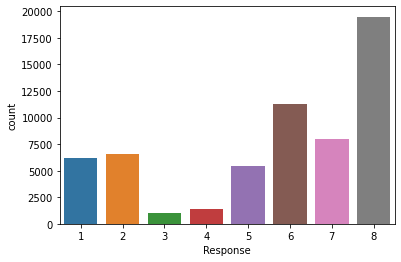

In [ ]:
sns.countplot(df_train['Response'])
plt.show()

From the above plot, we can see that the data is imbalanced so, we decided to convert 8 classes into 3 classes.

In [ ]:
def bin_target(data):
  ''' Binning the target variable with 8 classes to 3 classes.
  Args:
    data - Column with target variable

  Returns:
    new_target_col - Binned response columnn based on the value
  '''
  if data == 8:
    return 2
  elif data <= 4:
    return 0
  elif data > 4 and data < 8:
    return 1
  else:
    pass

In [ ]:
df_train['new_response'] = df_train['Response'].map(bin_target)

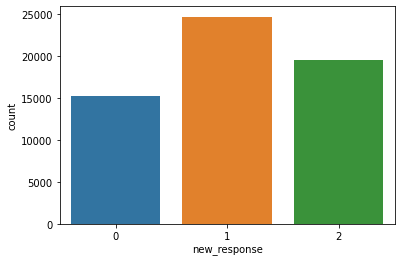

In [ ]:
sns.countplot(x = df_train['new_response'])
plt.show()

Now we can see that the new binned response variable is not imbalanced and each class has now similar number of data points

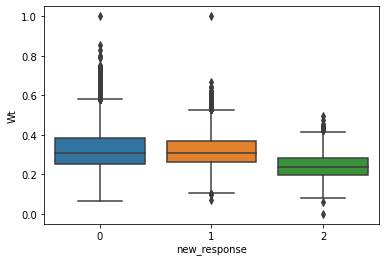

In [ ]:
ax = sns.boxplot(y = df_train['Wt'], x = df_train['new_response'])
ax.set_xticks(range(0, 3, 1))
plt.show()

To validate if the new target variable has been correctly binned, we plotted the scatterplot of Weight vs New Target Variable and as we can see that the patients having highest weight have response of 0 or 1 and not 2 which validates that patients having highest weight are at more risky compared to other patients.

In [ ]:
df_train[['Product_Info_2']].head()

,Product_Info_2
0,D3
1,A1
2,E1
3,D4
4,D2


As next step we would be splitting the Product_Info column into two columns one having the number of the product and another having the character part of the column as this might have a correlation with the response.

In [ ]:
df_train['Product_Info_2_num'] = df_train['Product_Info_2'].astype(str).str[1]
df_train['Product_Info_2_char'] = df_train['Product_Info_2'].astype(str).str[0]

In [ ]:
df_train[['Product_Info_2', 'Product_Info_2_num', 'Product_Info_2_char']].head()

,Product_Info_2,Product_Info_2_num,Product_Info_2_char
0,D3,3,D
1,A1,1,A
2,E1,1,E
3,D4,4,D
4,D2,2,D


Furthermore from the common factual we know that usually the patients that have the following characteristics are at higher risk.
- High BMI
- Obsese patients
- Old Age
- Shortest or Tallest Patient

So, inorder to clearly capture these characteristic, we will create the following features:
- Categorizing the BMI, Height, Weight and Age based on the statistical characteristic into 3 buckets such as low, medium and high.
- Combining BMI, Age and Height by taking Product of each combination.

In [ ]:
df_train['BMI_x_Age'] = df_train['BMI'] * df_train['Ins_Age']
df_train['Ht_x_Age'] = df_train['Ht'] * df_train['Ins_Age']
df_train['Wt_x_Age'] = df_train['Wt'] * df_train['Ins_Age']

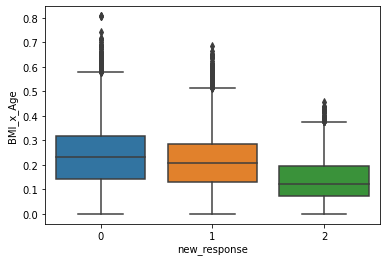

In [ ]:
ax = sns.boxplot(y = df_train['BMI_x_Age'], x = df_train['new_response'])
ax.set_xticks(range(0, 3, 1))
plt.show()

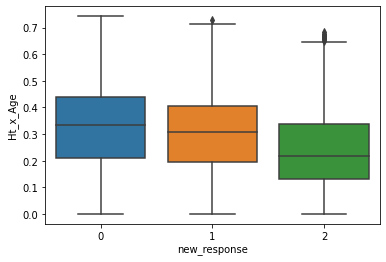

In [ ]:
ax = sns.boxplot(y = df_train['Ht_x_Age'], x = df_train['new_response'])
ax.set_xticks(range(0, 3, 1))
plt.show()

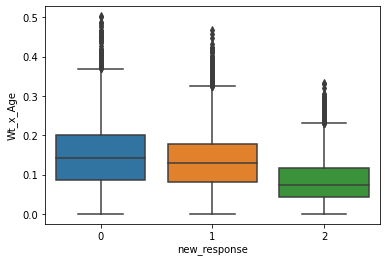

In [ ]:
ax = sns.boxplot(y = df_train['Wt_x_Age'], x = df_train['new_response'])
ax.set_xticks(range(0, 3, 1))
plt.show()

From all the above plots we can see that higher these quantities higher is the risk level, so these new features do seem to have some correlation with the target variable.

In [ ]:
conditions = [
    (df_train['BMI'] <= df_train['BMI'].quantile(0.25)),
    (df_train['BMI'] > df_train['BMI'].quantile(0.25)) & (df_train['BMI'] <= df_train['BMI'].quantile(0.75)),
    (df_train['BMI'] > df_train['BMI'].quantile(0.75))]

In [ ]:
category_lbl = ['under_weight', 'average', 'overweight']
df_train['BMI_Wt_category'] = np.select(conditions, category_lbl)

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_47,Medical_Keyword_48,Response,new_response,Product_Info_2_num,Product_Info_2_char,BMI_x_Age,Ht_x_Age,Wt_x_Age,BMI_Wt_category
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,8,2,3,D,0.207304,0.373406,0.095329,under_weight
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,4,0,1,A,0.016256,0.035821,0.007869,under_weight
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,8,2,1,E,0.012799,0.022252,0.008618,average
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,8,2,4,D,0.057863,0.110448,0.033660,under_weight
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,8,2,2,D,0.177213,0.273541,0.097920,average


In [ ]:
conditions = [
    (df_train['Ins_Age'] <= df_train['Ins_Age'].quantile(0.25)),
    (df_train['Ins_Age'] > df_train['Ins_Age'].quantile(0.25)) & (df_train['Ins_Age'] <= df_train['Ins_Age'].quantile(0.75)),
    (df_train['Ins_Age'] > df_train['Ins_Age'].quantile(0.75))]

In [ ]:
category_lbl = ['young', 'average', 'old']
df_train['Age_category'] = np.select(conditions, category_lbl)

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_48,Response,new_response,Product_Info_2_num,Product_Info_2_char,BMI_x_Age,Ht_x_Age,Wt_x_Age,BMI_Wt_category,Age_category
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,8,2,3,D,0.207304,0.373406,0.095329,under_weight,old
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,4,0,1,A,0.016256,0.035821,0.007869,under_weight,young
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,8,2,1,E,0.012799,0.022252,0.008618,average,young
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,8,2,4,D,0.057863,0.110448,0.033660,under_weight,young
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,8,2,2,D,0.177213,0.273541,0.097920,average,average


In [ ]:
conditions = [
    (df_train['Ht'] <= df_train['Ht'].quantile(0.25)),
    (df_train['Ht'] > df_train['Ht'].quantile(0.25)) & (df_train['Ht'] <= df_train['Ht'].quantile(0.75)),
    (df_train['Ht'] > df_train['Ht'].quantile(0.75))]

In [ ]:
category_lbl = ['short', 'average', 'tall']
df_train['Height_category'] = np.select(conditions, category_lbl)

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Response,new_response,Product_Info_2_num,Product_Info_2_char,BMI_x_Age,Ht_x_Age,Wt_x_Age,BMI_Wt_category,Age_category,Height_category
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,8,2,3,D,0.207304,0.373406,0.095329,under_weight,old,short
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,4,0,1,A,0.016256,0.035821,0.007869,under_weight,young,short
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,8,2,1,E,0.012799,0.022252,0.008618,average,young,average
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,8,2,4,D,0.057863,0.110448,0.033660,under_weight,young,average
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,8,2,2,D,0.177213,0.273541,0.097920,average,average,short


In [ ]:
conditions = [
    (df_train['Wt'] <= df_train['Wt'].quantile(0.25)),
    (df_train['Wt'] > df_train['Wt'].quantile(0.25)) & (df_train['Wt'] <= df_train['Wt'].quantile(0.75)),
    (df_train['Wt'] > df_train['Wt'].quantile(0.75))]

In [ ]:
category_lbl = ['thin', 'average', 'fat']
df_train['Weight_category'] = np.select(conditions, category_lbl)

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,new_response,Product_Info_2_num,Product_Info_2_char,BMI_x_Age,Ht_x_Age,Wt_x_Age,BMI_Wt_category,Age_category,Height_category,Weight_category
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,2,3,D,0.207304,0.373406,0.095329,under_weight,old,short,thin
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,1,A,0.016256,0.035821,0.007869,under_weight,young,short,thin
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,2,1,E,0.012799,0.022252,0.008618,average,young,average,average
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,2,4,D,0.057863,0.110448,0.033660,under_weight,young,average,thin
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,2,2,D,0.177213,0.273541,0.097920,average,average,short,average


In [ ]:
df_train.columns[df_train.columns.str.startswith('Medical_Keyword_')]

Index(['Medical_Keyword_1', 'Medical_Keyword_2', 'Medical_Keyword_3',
       'Medical_Keyword_4', 'Medical_Keyword_5', 'Medical_Keyword_6',
       'Medical_Keyword_7', 'Medical_Keyword_8', 'Medical_Keyword_9',
       'Medical_Keyword_10', 'Medical_Keyword_11', 'Medical_Keyword_12',
       'Medical_Keyword_13', 'Medical_Keyword_14', 'Medical_Keyword_15',
       'Medical_Keyword_16', 'Medical_Keyword_17', 'Medical_Keyword_18',
       'Medical_Keyword_19', 'Medical_Keyword_20', 'Medical_Keyword_21',
       'Medical_Keyword_22', 'Medical_Keyword_23', 'Medical_Keyword_24',
       'Medical_Keyword_25', 'Medical_Keyword_26', 'Medical_Keyword_27',
       'Medical_Keyword_28', 'Medical_Keyword_29', 'Medical_Keyword_30',
       'Medical_Keyword_31', 'Medical_Keyword_32', 'Medical_Keyword_33',
       'Medical_Keyword_34', 'Medical_Keyword_35', 'Medical_Keyword_36',
       'Medical_Keyword_37', 'Medical_Keyword_38', 'Medical_Keyword_39',
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_

As we see that there are 48 Medical Keyword Columns that represent the presence of a medical keyword, so now we will create a new column that will take the sum of all these 48 columns.

In [ ]:
medical_columns = df_train.columns[df_train.columns.str.startswith('Medical_Keyword_')]

In [ ]:
df_train['Total_Medical_Keywords_Count'] = df_train[medical_columns].sum(axis = 1)

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Product_Info_2_num,Product_Info_2_char,BMI_x_Age,Ht_x_Age,Wt_x_Age,BMI_Wt_category,Age_category,Height_category,Weight_category,Total_Medical_Keywords_Count
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,3,D,0.207304,0.373406,0.095329,under_weight,old,short,thin,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,1,A,0.016256,0.035821,0.007869,under_weight,young,short,thin,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,1,E,0.012799,0.022252,0.008618,average,young,average,average,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,4,D,0.057863,0.110448,0.033660,under_weight,young,average,thin,1
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,2,D,0.177213,0.273541,0.097920,average,average,short,average,0


Now based on the newly created features we will create new target features that might potentially help in the prediction.

For the same we would be using the following hypothesis:
- If the BMI_Wt_Category = overweight or Age_Category = Old or Weight_Category = fat then we will bucket them as extreme risk category or else not extreme risk category.

- If the BMI_Wt_Category = average or Age_Category = average or Weight_Category = average or Height_Categoty = average then we will bucket them as average risk or else non average risk. 

- If the BMI_Wt_Category = low or Age_Category = low or Weight_Category = low or Height_Categoty = low then we will bucket them as low risk or else non low risk. 

- If the BMI_Wt_Category = overweight or Age_Category = old or Weight_Category = fat or Height_Categoty = tall then we will bucket them as high risk or else non high risk.

In [ ]:
def assign_target(lbl1, lbl2, lbl3):
  ''' Creating a new column based on the value BMI_Weight_Category, Age_Category, and Weight_Category
  Args:
    data - BMI_Weight_Category, Age_Category, Weight_Category

  Returns:
    new_target_col - based on the combination of values returns the overall risk types
  '''
  if (lbl1 == 'overweight') or (lbl2 == 'old') or (lbl3 == 'fat'):
    return 'extreme_risk'
  else:
    return 'not_extreme_risk'

In [ ]:
df_train['overall_risk'] = df_train.apply(lambda x: assign_target(x['BMI_Wt_category'], x['Age_category'], x['Weight_category']), axis = 1)

In [ ]:
def assign_target1(lbl1, lbl2, lbl3, lbl4):
  ''' Creating a new column based on the value BMI_Weight_Category, Age_Category, Weight_Category, and Height_Category.
  Args:
    data - BMI_Weight_Category, Age_Category, Weight_Category, and Height_Category

  Returns:
    new_target_col - based on the combination of values returns the overall risk types
  '''
  
  if (lbl1 == 'average') or (lbl2 == 'average') or (lbl3 == 'average') or (lbl4 == 'average'):
    return 'average_risk'
  else:
    return 'non_average_risk'

In [ ]:
df_train['average_risk'] = df_train.apply(lambda x: assign_target1(x['BMI_Wt_category'], x['Age_category'], x['Weight_category'], x['Height_category']), axis = 1)

In [ ]:
def assign_target2(lbl1, lbl2, lbl3, lbl4):
  ''' Creating a new column based on the value BMI_Weight_Category, Age_Category, Weight_Category, and Height_Category.
  Args:
    data - BMI_Weight_Category, Age_Category, Weight_Category, and Height_Category

  Returns:
    new_target_col - based on the combination of values returns the overall risk types
  '''
  
  if (lbl1 == 'under_weight') or (lbl2 == 'young') or (lbl3 == 'thin') or (lbl4 == 'short'):
    return 'low_risk'
  else:
    return 'non_low_risk'

In [ ]:
df_train['low_risk'] = df_train.apply(lambda x: assign_target2(x['BMI_Wt_category'], x['Age_category'], x['Weight_category'], x['Height_category']), axis = 1)

In [ ]:
def assign_target3(lbl1, lbl2, lbl3, lbl4):
  ''' Creating a new column based on the value BMI_Weight_Category, Age_Category, Weight_Category, and Height_Category.
  Args:
    data - BMI_Weight_Category, Age_Category, Weight_Category, and Height_Category

  Returns:
    new_target_col - based on the combination of values returns the overall risk types
  '''
  
  if (lbl1 == 'overweight') or (lbl2 == 'old') or (lbl3 == 'thin') or (lbl4 == 'short'):
    return 'high_risk'
  else:
    return 'non_high_risk'

In [ ]:
df_train['high_risk'] = df_train.apply(lambda x: assign_target3(x['BMI_Wt_category'], x['Age_category'], x['Weight_category'], x['Height_category']), axis = 1)

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Wt_x_Age,BMI_Wt_category,Age_category,Height_category,Weight_category,Total_Medical_Keywords_Count,overall_risk,average_risk,low_risk,high_risk
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0.095329,under_weight,old,short,thin,0,extreme_risk,non_average_risk,low_risk,high_risk
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0.007869,under_weight,young,short,thin,0,not_extreme_risk,non_average_risk,low_risk,high_risk
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0.008618,average,young,average,average,0,not_extreme_risk,average_risk,low_risk,non_high_risk
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0.033660,under_weight,young,average,thin,1,not_extreme_risk,average_risk,low_risk,high_risk
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0.097920,average,average,short,average,0,not_extreme_risk,average_risk,low_risk,high_risk


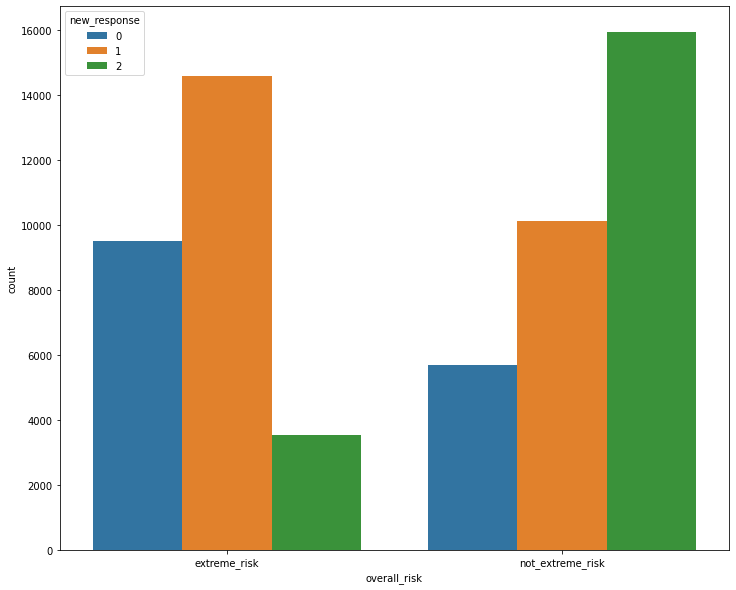

In [ ]:
plt.figure(figsize = (12,10))
sns.countplot(data = df_train, x = 'overall_risk', hue = 'new_response')
plt.show()

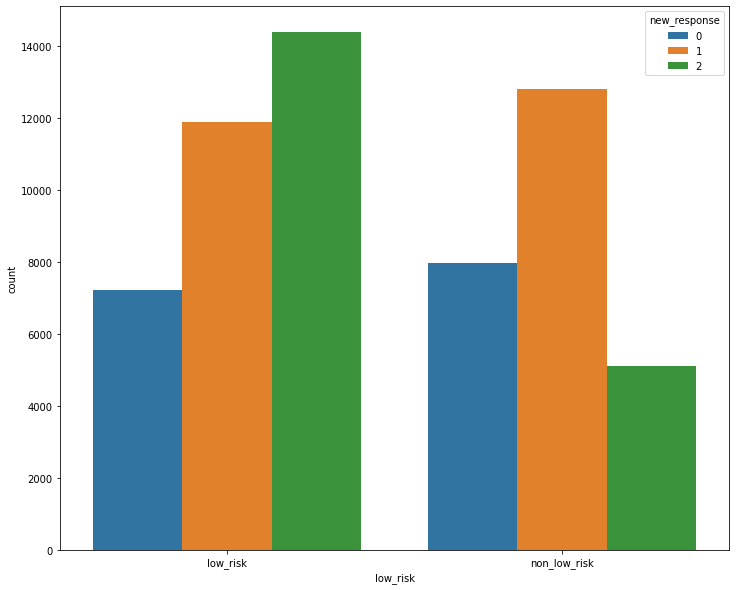

In [ ]:
plt.figure(figsize = (12,10))
sns.countplot(data = df_train, x = 'low_risk', hue = 'new_response')
plt.show()

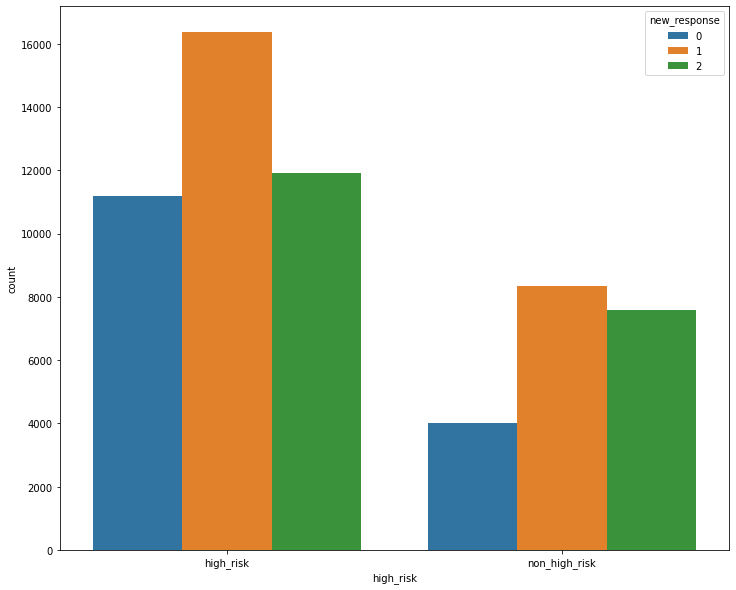

In [ ]:
plt.figure(figsize = (12,10))
sns.countplot(data = df_train, x = 'high_risk', hue = 'new_response')
plt.show()

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Wt_x_Age,BMI_Wt_category,Age_category,Height_category,Weight_category,Total_Medical_Keywords_Count,overall_risk,average_risk,low_risk,high_risk
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0.095329,under_weight,old,short,thin,0,extreme_risk,non_average_risk,low_risk,high_risk
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0.007869,under_weight,young,short,thin,0,not_extreme_risk,non_average_risk,low_risk,high_risk
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0.008618,average,young,average,average,0,not_extreme_risk,average_risk,low_risk,non_high_risk
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0.033660,under_weight,young,average,thin,1,not_extreme_risk,average_risk,low_risk,high_risk
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0.097920,average,average,short,average,0,not_extreme_risk,average_risk,low_risk,high_risk


In [ ]:
def handle_missing_values(data):
  ''' Handling the missing values, and dropping the column where missing value percentage > 50% or imputing the NAs with mean of the column.
  Args:
    data - dataframe

  Returns:
    new_data - updated dataframe with dropped columns (columns having >= 50% missing data) or imputed missing values (columns having < 50% missing data).
  '''

  missing_val_col_names = []
  missing_dict_perc = dict(df_train.isnull().sum() / df_train.shape[0] * 100.00)
  for i in missing_dict_perc.items():
    if i[1] >= 50:
      data.drop([str(i[0])], axis = 1, inplace = True)
    elif i[1] > 0:
      replace_val = data[i[0]].mean()
      if i[0] == 'Medical_History_1':
        replace_val = int(replace_val)
      
      data[i[0]] = data[i[0]].fillna(replace_val)
    else:
      pass
  return data

In [ ]:
df_train = handle_missing_values(df_train)

In [ ]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Wt_x_Age,BMI_Wt_category,Age_category,Height_category,Weight_category,Total_Medical_Keywords_Count,overall_risk,average_risk,low_risk,high_risk
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0.095329,under_weight,old,short,thin,0,extreme_risk,non_average_risk,low_risk,high_risk
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0.007869,under_weight,young,short,thin,0,not_extreme_risk,non_average_risk,low_risk,high_risk
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0.008618,average,young,average,average,0,not_extreme_risk,average_risk,low_risk,non_high_risk
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0.033660,under_weight,young,average,thin,1,not_extreme_risk,average_risk,low_risk,high_risk
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0.097920,average,average,short,average,0,not_extreme_risk,average_risk,low_risk,high_risk


In [ ]:
df_train.drop(['Id'], axis = 1, inplace = True)

In [ ]:
def encoder_col(data, exclude):
  ''' Encoding the categorical columns while excluding the columns given in a list.
  Args:
    data - dataframe 
    exclude - list of the column names to be excluded for encoding

  Returns:
    new_data - updated dataframe with encoded categorical values
  '''

  for i in data.columns:
    if data[i].dtype != 'float64' and i not in exclude:
      
      enc = LabelEncoder()
      data[i] = enc.fit_transform(data[i])
  
  return data

In [ ]:
exlcude = ['Response', 'new_response', 'Total_Medical_Keywords_Count']

In [ ]:
df_train_final = encoder_col(df_train, exlcude)

In [ ]:
df_train_final.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Wt_x_Age,BMI_Wt_category,Age_category,Height_category,Weight_category,Total_Medical_Keywords_Count,overall_risk,average_risk,low_risk,high_risk
0,0,16,8,0.076923,0,0,0,0.641791,0.581818,0.148536,...,0.095329,2,1,1,2,0,0,1,0,0
1,0,0,22,0.076923,0,1,0,0.059701,0.600000,0.131799,...,0.007869,2,2,1,2,0,1,1,0,0
2,0,18,22,0.076923,0,1,0,0.029851,0.745455,0.288703,...,0.008618,0,2,0,0,0,1,0,0,1
3,0,17,8,0.487179,0,1,0,0.164179,0.672727,0.205021,...,0.033660,2,2,0,2,1,1,0,0,0
4,0,15,22,0.230769,0,1,0,0.417910,0.654545,0.234310,...,0.097920,0,0,1,0,0,1,0,0,0
